# German Web Tracking: Online Browsing Behaviour (Individual Browsing EDA)

**Date:** 25 November 2024

**Link to dataset:** https://zenodo.org/records/4757574

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../../"))

In [2]:
from cybergpt.datasets.loaders import WebTrackingLoader
from cybergpt.datasets.websites import (
    WebsiteDataset,
    plot_temporal_patterns,
    plot_temporal_stability,
)
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
DATA_CSV = "../../data/web_tracking/web_routineness_release/raw/browsing.csv"

In [4]:
df = pd.read_csv(DATA_CSV).query("panelist_id == 1")
df = WebTrackingLoader.preprocess_user_frame(df)

In [5]:
len(df)

4453

In [7]:
df["date"].nunique()

31

In [6]:
hourly_activity, daily_activity, daily_volume = (
    WebsiteDataset.analyse_temporal_patterns(df)
)
rapid_requests, unusual_hours = WebsiteDataset.detect_anomalous_patterns(df)
domain_counts, large_volume_domains, category_distribution = (
    WebsiteDataset.analyse_domain_patterns(df)
)
similarity_df, distributions = WebsiteDataset.analyse_temporal_stability(df)

# Summary Stats

## Browsing Activity

In [8]:
print(f"Total records: {len(df)}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Unique domains visited: {df['domain'].nunique()}")

Total records: 4453
Date range: 2018-10-01 10:33:01 to 2018-10-31 22:56:33
Unique domains visited: 135


## Unusual Activity

In [9]:
print(f"Rapid succession requests: {rapid_requests}")
print(f"Unusual hours activity: {unusual_hours}")

Rapid succession requests: 0
Unusual hours activity: 239


## Domains

In [10]:
print("Top 10 most visited domains:")
print(domain_counts.head(10))

Top 10 most visited domains:
domain
ebay.de             1213
gmx.net              667
bonus-bunny.de       590
deutsche-bank.de     276
google.de            251
deref-gmx.net        189
questler.de          149
adcell.de            122
myway.com             85
amazon.de             64
Name: count, dtype: int64


## Distributional Stability Over Time

In [12]:
print("Average Jensen-Shannon distances by day:")
print(similarity_df.groupby("day_of_week")["js_distance"].mean())

Average Jensen-Shannon distances by day:
day_of_week
0    0.771417
1    0.734253
2    0.699621
3    0.628554
4    0.745604
5    0.765005
6    0.793477
Name: js_distance, dtype: float64


# Plots

/Users/marcos/Documents/projects/bai/cybergpt-datasets/datasets/websites.py:387: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(days)


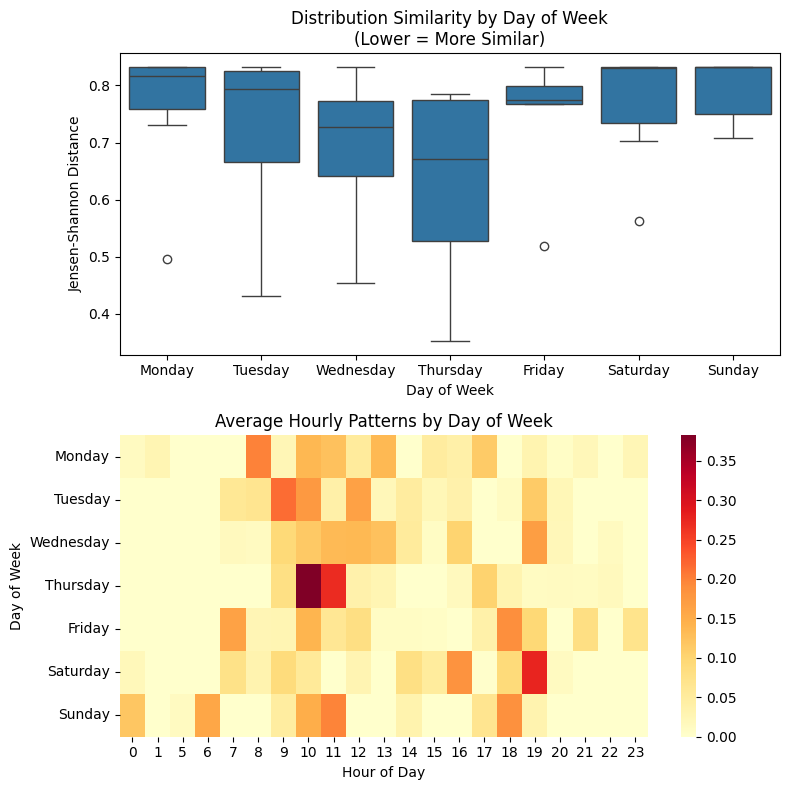

In [13]:
plot_temporal_stability(similarity_df, distributions)
plt.show()

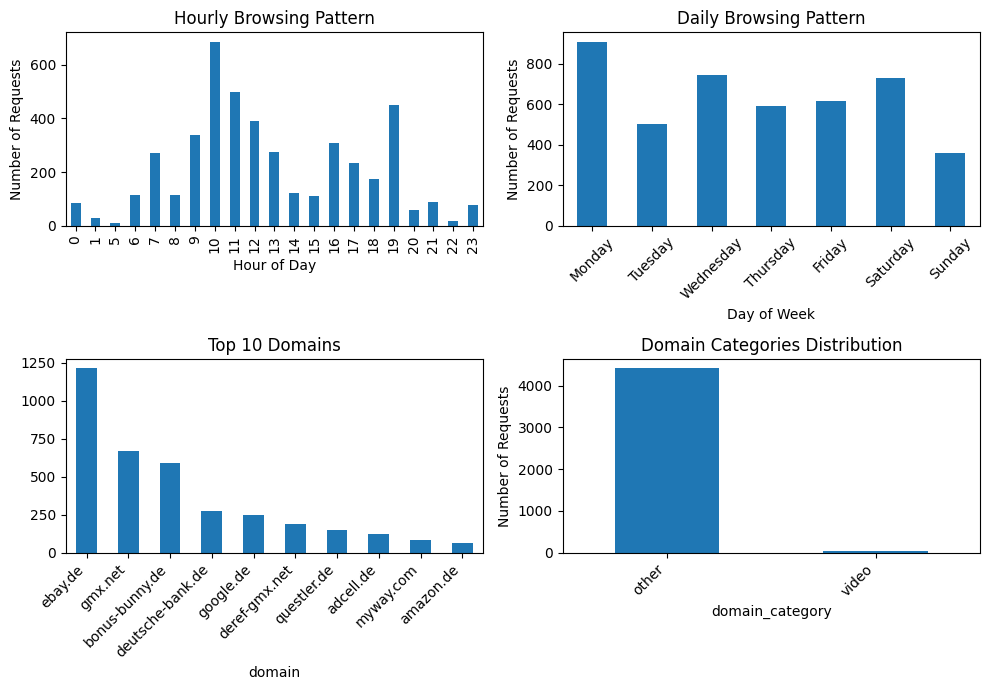

In [14]:
plot_temporal_patterns(
    hourly_activity, daily_activity, domain_counts, category_distribution
)
plt.show()